In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
from sas7bdat import SAS7BDAT

In [3]:
with SAS7BDAT(r'maize.sas7bdat', skip_header=False) as reader:
    df = reader.to_data_frame()

[maize.sas7bdat] column count mismatch


In [4]:
df

,Geno_Code,pop,m1,m2,m3,m4,m5,m6,m7,m8,...,m7382,m7383,m7384,m7385,m7386,m7387,m7388,m7389,Entry,DtoA
0,Z001E0001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,75.5364
1,Z001E0002,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,76.9075
2,Z001E0003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,75.2646
3,Z001E0004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,73.6933
4,Z001E0005,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,79.2441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Z026E0196,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,196.0,77.6523
4977,Z026E0197,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,197.0,78.5015
4978,Z026E0198,25.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.0,77.4219
4979,Z026E0199,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,199.0,78.6712


In [5]:
df.dtypes

Geno_Code     object
pop          float64
m1           float64
m2           float64
m3           float64
              ...   
m7387        float64
m7388        float64
m7389        float64
Entry        float64
DtoA         float64
Length: 7393, dtype: object

In [6]:
df=df.dropna(how='any')

In [7]:
df

,Geno_Code,pop,m1,m2,m3,m4,m5,m6,m7,m8,...,m7382,m7383,m7384,m7385,m7386,m7387,m7388,m7389,Entry,DtoA
0,Z001E0001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,75.5364
1,Z001E0002,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,76.9075
2,Z001E0003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,75.2646
3,Z001E0004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,73.6933
4,Z001E0005,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,79.2441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Z026E0196,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,196.0,77.6523
4977,Z026E0197,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,197.0,78.5015
4978,Z026E0198,25.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.0,77.4219
4979,Z026E0199,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,199.0,78.6712


In [8]:
len(df)

4494

## Visualization of dependent variable (Male flowering time)

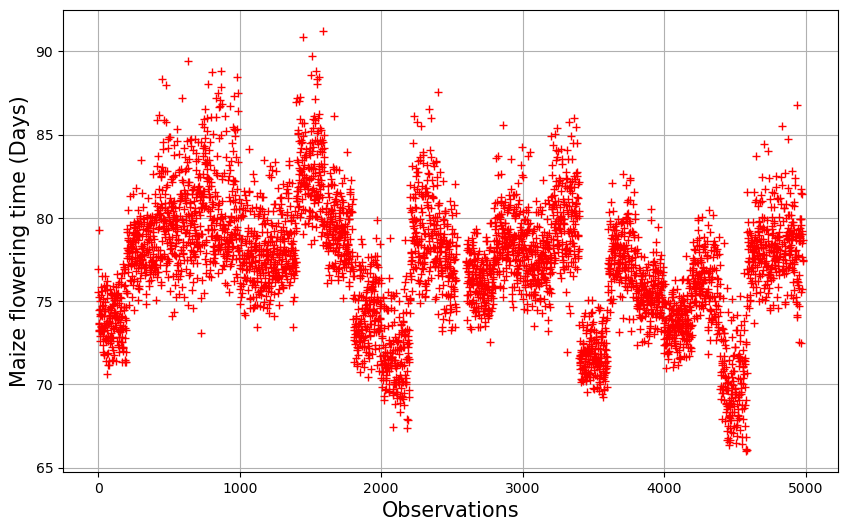

In [9]:
fig,ax=plt.subplots(figsize=(10,6))

ax.plot(df['DtoA'],'+',color='red')

plt.ylabel('Maize flowering time (Days)',size='15')

plt.xlabel('Observations',size='15')

plt.grid(True)

plt.savefig("Male Flowering time.svg",dpi = 1200)

In [10]:
df=df.drop(['Geno_Code','pop','Entry'],axis=1)

In [11]:
scaler = StandardScaler(with_mean=False)

## Feature selection by decision tree model (XGBoost)

In [12]:
x_vals=df.copy()

x_vals.drop('DtoA',1,inplace=True)

y_vals=df['DtoA']

C:\Users\md805971\AppData\Local\Temp\ipykernel_11188\1278871910.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_vals.drop('DtoA',1,inplace=True)


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV as RandomCV

In [14]:
#spliting data_set into test and train set 
X_train, X_test, Y_train, Y_test = train_test_split(x_vals, y_vals, test_size=0.3, random_state=0)

In [15]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=0)
model.fit(X_train, Y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [16]:
importances

,Attribute,Importance
6501,m6502,0.008121
438,m439,0.005088
442,m443,0.004724
6915,m6916,0.004594
372,m373,0.004517
...,...,...
4465,m4466,0.000000
4466,m4467,0.000000
1932,m1933,0.000000
4468,m4469,0.000000


C:\Users\md805971\AppData\Local\Temp\ipykernel_11188\777961581.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(x=importances['Attribute'][0:20], height=importances['Importance'][0:20], color='g')


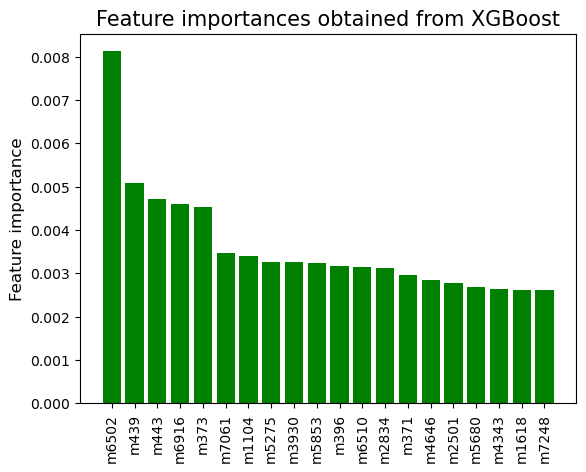

In [17]:
plt.bar(x=importances['Attribute'][0:20], height=importances['Importance'][0:20], color='g')
plt.title('Feature importances obtained from XGBoost', size=15)
plt.xticks(rotation='vertical')
plt.ylabel("Feature importance",size=12)
plt.savefig('feature importance.svg', bbox_inches='tight', dpi =1200)
plt.show()

C:\Users\md805971\AppData\Local\Temp\ipykernel_11188\4093664464.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.barh(importances['Attribute'][0:20], importances['Importance'][0:20], color='g')


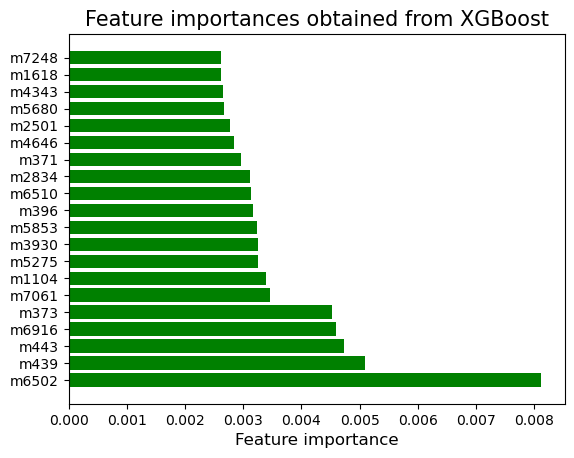

In [18]:
plt.barh(importances['Attribute'][0:20], importances['Importance'][0:20], color='g')
plt.title('Feature importances obtained from XGBoost', size=15)
#plt.xticks(rotation='vertical')
plt.xlabel("Feature importance",size=12)
plt.savefig('feature importance_horizontal.svg', bbox_inches='tight', dpi =1200)
plt.show()

In [19]:
max(model.feature_importances_)

0.008120636

In [20]:
min(model.feature_importances_)

0.0

## Pairplots based on top 5 features

In [21]:
importances_5 = importances.head(5)
feature_list=list(importances_5['Attribute'])
df_pplot=df.filter(feature_list)

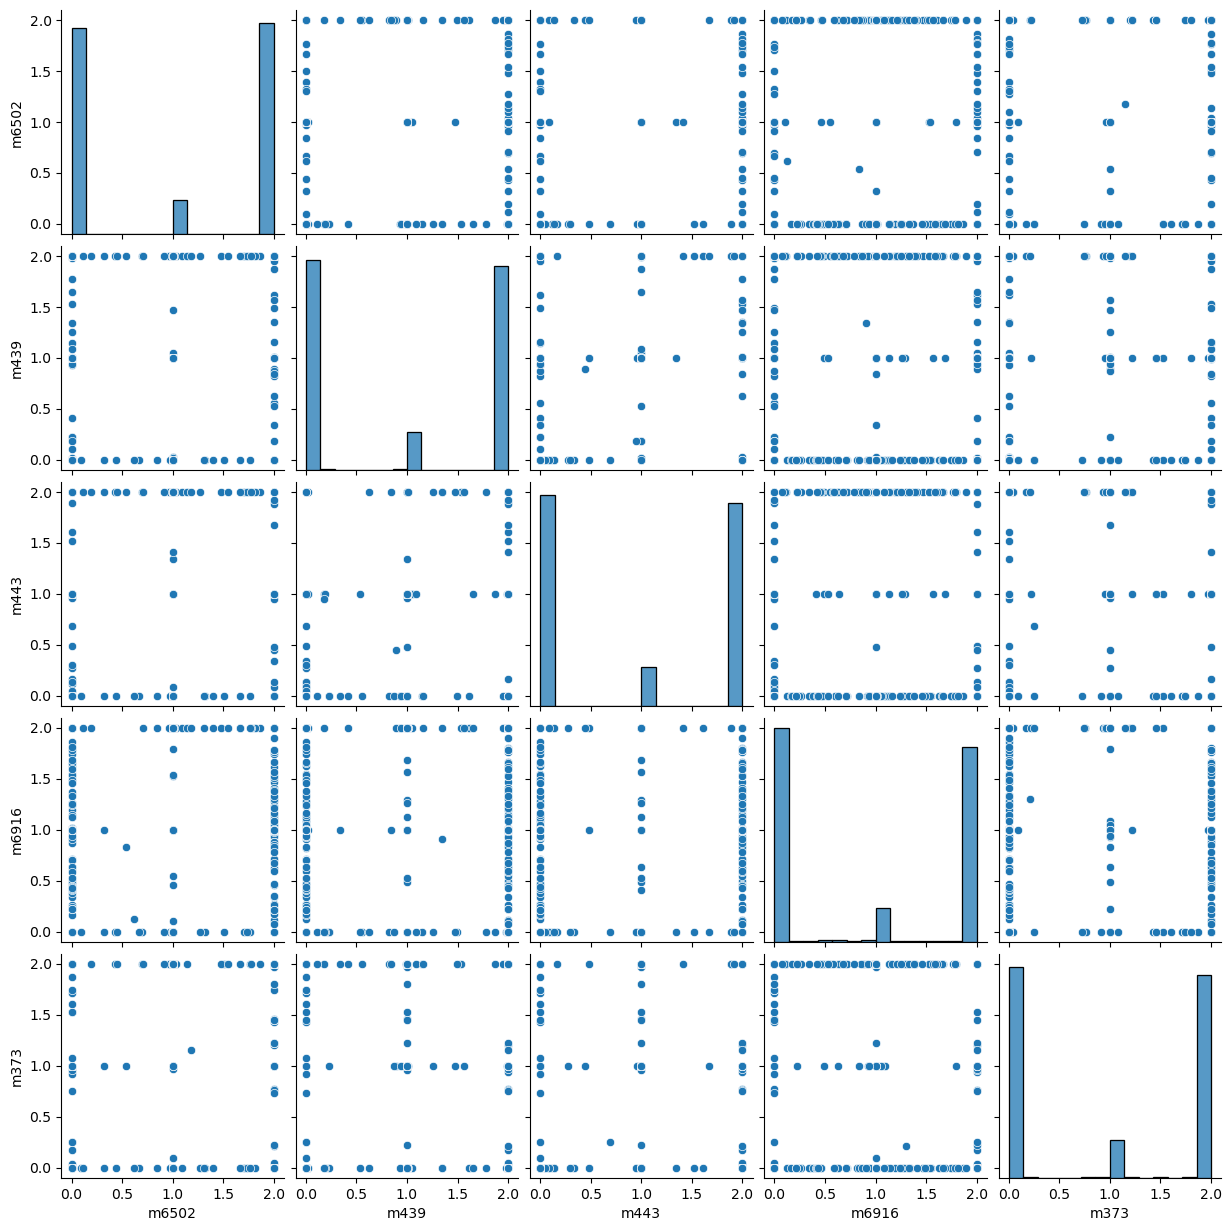

In [22]:
sns.pairplot(df_pplot.loc[:,df_pplot.dtypes == 'float64'])
plt.savefig('pairplot_5.svg',dpi=600)
plt.show()

## Pearson Corelation Matrix for the first 10 most important features

In [23]:
importances_10 = importances.head(10)
feature_list=list(importances_10['Attribute'])
df_pplot=df.filter(feature_list)

In [24]:
feature_list

['m6502',
 'm439',
 'm443',
 'm6916',
 'm373',
 'm7061',
 'm1104',
 'm5275',
 'm3930',
 'm5853']

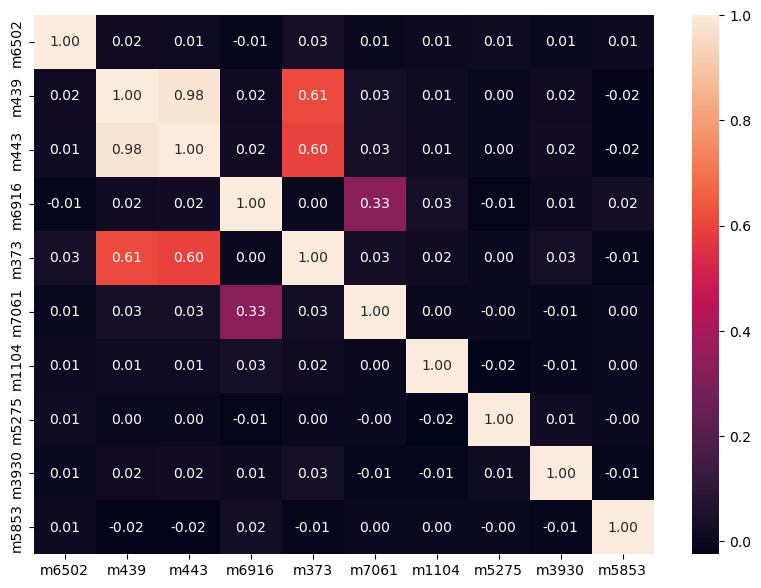

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df_pplot.corr(),annot=True, fmt=".2f")
plt.axis('tight')
plt.savefig('corelation_10.svg',dpi=1200)

plt.show()

## Filtering only the important features: threshold 0.001¶

In [27]:
importances_new=importances[importances['Importance']>0.001]

to_filter=list(importances_new['Attribute'])
x_vals_new=x_vals.filter(to_filter)

In [28]:
len(importances_new)

282

## filtering all Highly correlated variables

In [29]:
# Create correlation matrix
corr_matrix_new = x_vals_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix_new.where(np.triu(np.ones(corr_matrix_new.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]

In [30]:
to_drop

['m443',
 'm6510',
 'm371',
 'm6497',
 'm5335',
 'm5684',
 'm5334',
 'm372',
 'm7057',
 'm7056',
 'm5936',
 'm207',
 'm5424',
 'm5722',
 'm7068',
 'm3029',
 'm270',
 'm4845',
 'm4643',
 'm3707',
 'm1921',
 'm6591',
 'm5850',
 'm7052',
 'm5852',
 'm6562',
 'm4693',
 'm5428',
 'm6926',
 'm3452',
 'm6375',
 'm6665',
 'm4992',
 'm1619',
 'm7300',
 'm1636',
 'm5197',
 'm4798',
 'm4990',
 'm6568',
 'm5280',
 'm5789',
 'm5122',
 'm2835',
 'm1436',
 'm5018',
 'm4083',
 'm368',
 'm5679',
 'm1477',
 'm7245',
 'm1682',
 'm1681',
 'm4652',
 'm6571',
 'm2868',
 'm459',
 'm5104',
 'm3573',
 'm4085',
 'm7251',
 'm6670',
 'm5685',
 'm7009',
 'm4090',
 'm6369',
 'm1623',
 'm2398',
 'm2471',
 'm2185',
 'm2607',
 'm3315',
 'm3274',
 'm2470',
 'm6371',
 'm5805',
 'm3298',
 'm2557',
 'm3672',
 'm1631',
 'm1318',
 'm5818']

In [31]:
len(to_drop)

82

In [32]:
x_vals_new1 = x_vals_new.drop(to_drop, axis=1)

In [33]:
x_vals_new1

,m6502,m439,m6916,m373,m7061,m1104,m5275,m3930,m5853,m396,...,m2435,m3696,m2154,m6346,m3717,m1944,m6424,m5301,m3040,m565
0,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
1,0.000000,2.0,2.0,0.0,0.0,1.0,2.0,0.0,2.0,2.0,...,0.0,0.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0
2,2.000000,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,...,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0
3,0.000000,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,2.0
4,1.768666,2.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,2.000000,0.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,2.0
4977,2.000000,0.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,...,1.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0
4978,0.000000,2.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,...,0.0,2.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0
4979,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,...,2.0,0.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0


## Linear Regression Model

In [75]:
# With all variables
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
  
regr.fit(X_train, Y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print(regr.score(X_test, Y_test))

-2.4128028606074796


In [76]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, y_pred, squared=False)

print(rmse)

6.719076848999008


In [77]:
print_evaluate(Y_test, regr.predict(X_test))
RMSE_lr= sqrt(mean_squared_error(Y_test, y_pred))

MAE: 5.358846638759635
MSE: 45.14599370275444
RMSE: 6.719076848999008
R2 Square -2.4128028606074796


(63.5, 96.5, 57.53280534507631, 102.02224736452017)

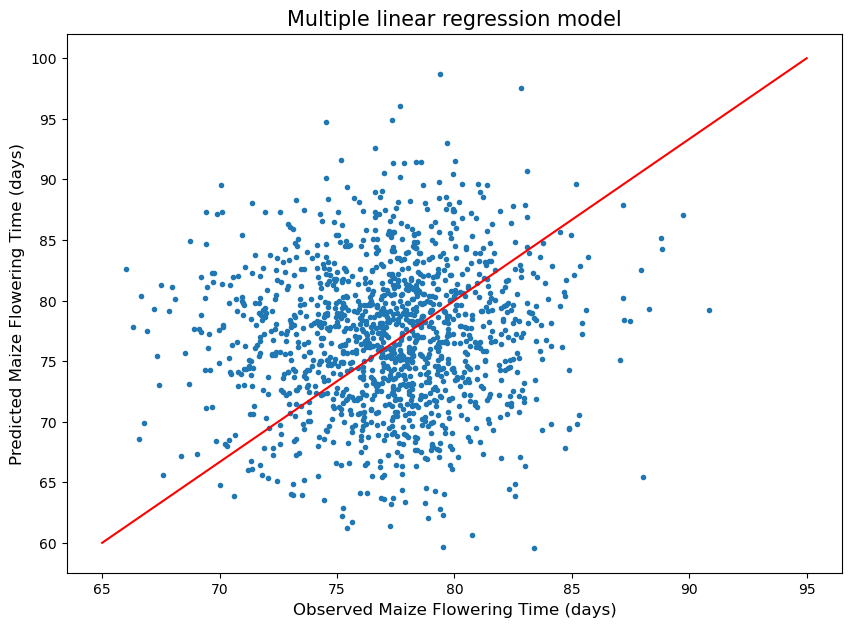

In [37]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(Y_test,y_pred,'.')
x=[65, 95]
y = [60, 100]
ax.plot(x,y,'r')
plt.title('Multiple linear regression model', size=15)
plt.xlabel("Observed Maize Flowering Time (days)",size=12)
plt.ylabel("Predicted Maize Flowering Time (days)",size=12)
plt.axis('tight')

In [71]:
# With 200 variables
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_vals_new1, y_vals, test_size=0.3, random_state=0)

In [72]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
  
regr.fit(X_train1, Y_train1)

# Make predictions using the testing set
y_pred1 = regr.predict(X_test1)

print(regr.score(X_test1, Y_test1))

-0.004067800294997648


In [73]:
from sklearn.metrics import mean_squared_error

rmse_linreg = mean_squared_error(Y_test1, y_pred1, squared=False)

print(rmse_linreg)

3.6444796298977122


In [74]:
print_evaluate(Y_test1, regr.predict(X_test1))
RMSE_lr= sqrt(mean_squared_error(Y_test1, y_pred1))

MAE: 2.831131972537144
MSE: 13.282231772739365
RMSE: 3.6444796298977122
R2 Square -0.004067800294997648


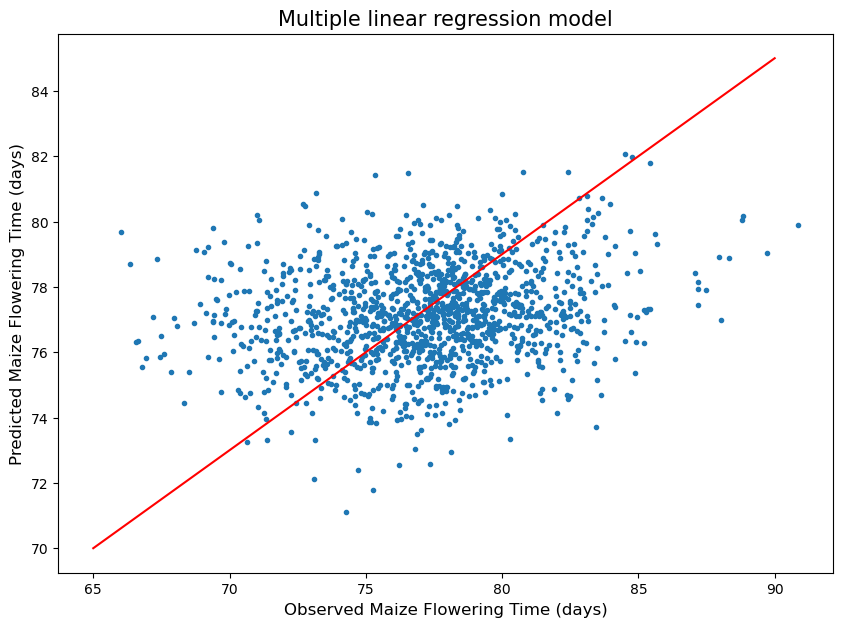

In [41]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(Y_test1,y_pred1,'.')
x=[65, 90]
y = [70, 85]
ax.plot(x,y,'r')
plt.title('Multiple linear regression model', size=15)
plt.xlabel("Observed Maize Flowering Time (days)",size=12)
plt.ylabel("Predicted Maize Flowering Time (days)",size=12)
plt.axis('tight')
plt.savefig('linear_regression_reduced_variables.svg',dpi=1200)

## Statistical way to compute linear regression

In [42]:
import statsmodels.api as sm

In [43]:
# with 282 variables
x_vals_new1['Intercept']=1

In [44]:
import statsmodels.api as sm

model = sm.OLS(y_vals,x_vals_new1)

res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   DtoA   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     3.308
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           6.67e-46
Time:                        18:38:34   Log-Likelihood:                -11901.
No. Observations:                4494   AIC:                         2.420e+04
Df Residuals:                    4293   BIC:                         2.549e+04
Df Model:                         200                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
m6502          0.2272      0.182      1.248      0.2

In [45]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [46]:
print_evaluate(Y_test1, regr.predict(X_test1))
RMSE_lr= sqrt(mean_squared_error(Y_test1, y_pred1))

MAE: 2.831131972537144
MSE: 13.282231772739365
RMSE: 3.6444796298977122
R2 Square -0.004067800294997648


## Ridge Regression Model

In [47]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

In [48]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train1, Y_train1)
alpha = ridge.alpha_
#print("Best alpha :", alpha)

#print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train1, Y_train1)
alpha = ridge.alpha_
#print("Best alpha :", alpha)

#print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
#print("Ridge RMSE:", rmse_cv_test(ridge).mean())
#print("Intercept: ", ridge.intercept_)
#print("Coefficients: ", ridge.coef_)
#y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test1)

print("ridge_r2 =", r2_score(Y_test1, y_test_rdg))

rmse_ridge = mean_squared_error(Y_test1, y_test_rdg, squared=False)

print('ridge_rmse = ', rmse_ridge)

ridge_r2 = 0.014742558478403
ridge_rmse =  3.6101801096366946


In [49]:
print_evaluate(Y_test1, ridge.predict(X_test1))
RMSE_ridge= sqrt(mean_squared_error(Y_test1, y_test_rdg ))

MAE: 2.7971964135066756
MSE: 13.033400424016417
RMSE: 3.6101801096366946
R2 Square 0.014742558478403


## Lasso Regression

In [50]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train1, Y_train1)
alpha = lasso.alpha_
#print("Best alpha :", alpha)

#print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)

lasso.fit(X_train1, Y_train1)
alpha = lasso.alpha_
#print("Best alpha :", alpha)

#print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
#print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
#print("Intercept: ", lasso.intercept_)
#print("Coefficients: ", lasso.coef_)
#y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test1)

print("Lasso_r2 =", r2_score(Y_test1, y_test_las))

rmse_lasso = mean_squared_error(Y_test1, y_test_las, squared=False)

print('ridge_rmse = ', rmse_lasso)

Lasso_r2 = 0.04412167712166448
ridge_rmse =  3.555947281415183


In [51]:
print_evaluate(Y_test1, lasso.predict(X_test1))
RMSE_lasso= sqrt(mean_squared_error(Y_test1, y_test_las ))

MAE: 2.7412774791356305
MSE: 12.64476106820403
RMSE: 3.555947281415183
R2 Square 0.04412167712166448


## Random Forest Regression

In [53]:
rnf = RandomForestRegressor(random_state=0)
rnf.fit(X_train1, Y_train1)
rnf_train=rnf.score(X_train1, Y_train1)
rnf_test=rnf.score(X_test1, Y_test1)
#print("Accuracy on training set: {:.3f}".format(rnf.score(X_train2, Y_train2)))
#print("Accuracy on test set: {:.3f}".format(rnf.score(X_test2, Y_test2)))
Y_pred_ran=rnf.predict(X_test1)
rmse_rnf= sqrt(mean_squared_error(Y_test1, Y_pred_ran))
print("r2=", r2_score(Y_test1, Y_pred_ran))

print("RMSE=",rmse_rnf)

r2= 0.03584675024708095
RMSE= 3.571305823683566


In [54]:
print_evaluate(Y_test1, rnf.predict(X_test1))
RMSE_random= sqrt(mean_squared_error(Y_test1, Y_pred_ran ))

MAE: 2.7672488295033344
MSE: 12.754225286276153
RMSE: 3.571305823683566
R2 Square 0.03584675024708095


## Gradient Boosting Regression

In [55]:
gbr = GradientBoostingRegressor(random_state=0)
gbr=gbr.fit(X_train1, Y_train1)
gbr_train=gbr.score(X_train1, Y_train1)
gbr_test=gbr.score(X_test1, Y_test1)
#print("Accuracy on training set: {:.3f}".format(gbr.score(X_train2, Y_train2)))
#print("Accuracy on test set: {:.3f}".format(gbr.score(X_test2, Y_test2)))
Y_pred_gbr = gbr.predict(X_test1)
rmse_gbr= sqrt(mean_squared_error(Y_test1, Y_pred_gbr))
print("r2=", r2_score(Y_test1, Y_pred_gbr))
print("RMSE=",rmse_gbr)

r2= 0.02472298929113459
RMSE= 3.59184842128634


In [56]:
print_evaluate(Y_test1, gbr.predict(X_test1))
RMSE_gbr= sqrt(mean_squared_error(Y_test1, Y_pred_gbr))

MAE: 2.785356549204607
MSE: 12.901375081497173
RMSE: 3.59184842128634
R2 Square 0.02472298929113459


## Knearest Neigbour Regressor

In [57]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5,weights='distance') 
model=knn.fit(X_train1, Y_train1)
Y_pred_Knn=model.predict(X_test1)
rmse_Knn= sqrt(mean_squared_error(Y_test1, Y_pred_Knn))
print("r2=", r2_score(Y_test1, Y_pred_Knn))
print("RMSE=",rmse_Knn)

r2= -0.20975150884384508
RMSE= 4.000387794052387


In [58]:
print_evaluate(Y_test1, knn.predict(X_test1))
RMSE_Knn= sqrt(mean_squared_error(Y_test1, Y_pred_Knn))

MAE: 3.10463363411248
MSE: 16.003102502803326
RMSE: 4.000387794052387
R2 Square -0.20975150884384508


## XGBoost Regression

In [59]:
import xgboost as xg
xgb_r= XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model= xgb_r.fit(X_train1, Y_train1)
Y_pred_xg=model.predict(X_test1)
rmse_XGBoost= sqrt(mean_squared_error(Y_test1, Y_pred_xg))
print("r2=", r2_score(Y_test1, Y_pred_xg))
print("RMSE=",rmse_XGBoost)

r2= -0.014436827717001277
RMSE= 3.6632496004069695


In [60]:
print_evaluate(Y_test1, xgb_r.predict(X_test1))
RMSE_xg= sqrt(mean_squared_error(Y_test1, Y_pred_xg))

MAE: 2.8497609122172385
MSE: 13.419397634881822
RMSE: 3.6632496004069695
R2 Square -0.014436827717001277


## Robust Regression

In [61]:
from sklearn.linear_model import RANSACRegressor

In [62]:
model = RANSACRegressor()
model.fit(X_train1, Y_train1)

pred = model.predict(X_test1)
print_evaluate(Y_test1, pred)
rmse_rr= sqrt(mean_squared_error(Y_test1, pred))

MAE: 15.132754217287262
MSE: 368.70116897169396
RMSE: 19.201592875896885
R2 Square -26.871895177692092


## Winner is Lasso Regression (High R_squared value and low RMSE)

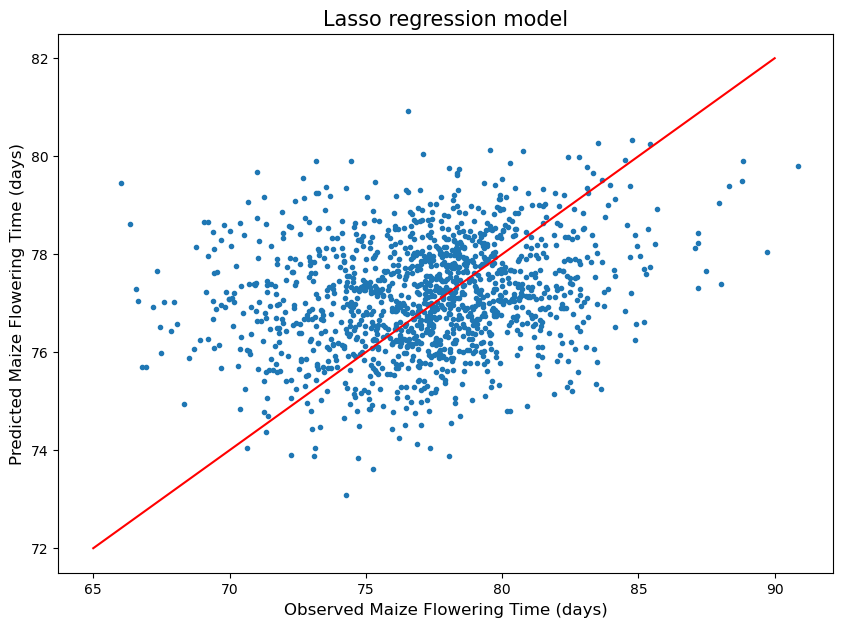

In [63]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(Y_test1,y_test_las,'.')
x=[65, 90]
y = [72, 82]
ax.plot(x,y,'r')
plt.title('Lasso regression model', size=15)
plt.xlabel("Observed Maize Flowering Time (days)",size=12)
plt.ylabel("Predicted Maize Flowering Time (days)",size=12)
plt.axis('tight')
plt.savefig('lasso_plot.svg',dpi=1200,bbox_inches='tight')

## Model Comparison

In [64]:
 RMSE=[rmse_linreg,rmse_ridge,rmse_lasso, rmse_rnf,rmse_gbr,rmse_Knn,rmse_XGBoost,rmse_rr]
RMSE

[3.6444796298977122,
 3.6101801096366946,
 3.555947281415183,
 3.571305823683566,
 3.59184842128634,
 4.000387794052387,
 3.6632496004069695,
 19.201592875896885]

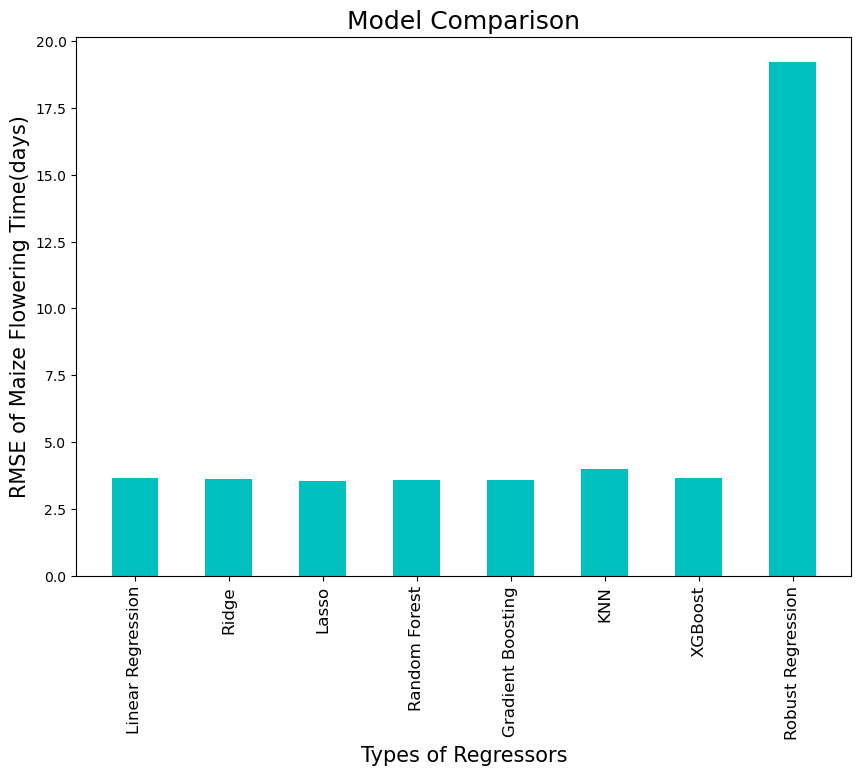

In [65]:
algorithm_type = [1,2,3,4,5,6,7,8]
LABELS = ["Linear Regression", "Ridge", "Lasso","Random Forest","Gradient Boosting","KNN","XGBoost","Robust Regression"]
fig, ax = plt.subplots(figsize=(10, 7))
plt.bar(algorithm_type, RMSE, width=0.5,align='center',color='c')
plt.xticks(algorithm_type, LABELS,size=12,rotation='vertical')
plt.title("Model Comparison", size=18)
plt.xlabel("Types of Regressors",size=15)
plt.ylabel("RMSE of Maize Flowering Time(days)",size=15)
plt.savefig('model_comparison_plot.svg',dpi=1200,bbox_inches='tight')

## Principal Component Analysis

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [67]:
df

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,...,m7381,m7382,m7383,m7384,m7385,m7386,m7387,m7388,m7389,DtoA
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.5364
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,76.9075
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.2646
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,73.6933
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.2441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,77.6523
4977,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,78.5015
4978,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.4219
4979,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,78.6712


In [68]:
x_vals=df.copy()

x_vals.drop('DtoA',1,inplace=True)

y_vals=df['DtoA']

C:\Users\md805971\AppData\Local\Temp\ipykernel_11188\1278871910.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_vals.drop('DtoA',1,inplace=True)


In [69]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(x_vals))

In [70]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

In [107]:
# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y_vals, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

In [108]:
# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 28):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y_vals, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'DtoA')

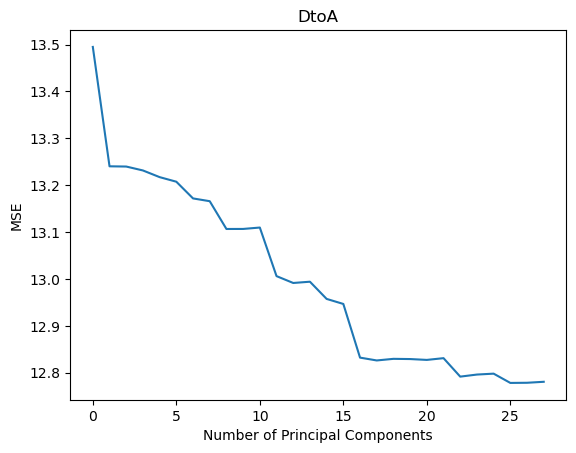

In [109]:
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('DtoA')

In [110]:
pp =np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [111]:
list(pp)

[3.4799999999999995,
 6.789999999999999,
 9.989999999999998,
 13.12,
 16.15,
 19.139999999999997,
 22.089999999999996,
 24.979999999999997,
 27.739999999999995,
 30.429999999999996,
 32.87,
 35.08,
 37.199999999999996,
 39.279999999999994,
 41.31999999999999,
 43.22999999999999,
 45.09999999999999,
 46.929999999999986,
 48.69999999999999,
 50.39999999999999,
 52.00999999999999,
 53.56999999999999,
 55.04999999999999,
 56.48999999999999,
 57.90999999999999,
 59.22999999999999,
 60.50999999999999,
 61.73999999999999,
 62.93999999999999,
 64.00999999999999,
 65.02,
 66.0,
 66.95,
 67.86,
 68.75,
 69.6,
 70.38,
 71.11,
 71.81,
 72.48,
 73.12,
 73.73,
 74.32000000000001,
 74.87,
 75.41000000000001,
 75.91000000000001,
 76.41000000000001,
 76.88000000000001,
 77.33000000000001,
 77.77000000000001,
 78.20000000000002,
 78.61000000000001,
 79.01000000000002,
 79.40000000000002,
 79.78000000000002,
 80.14000000000001,
 80.48000000000002,
 80.82000000000002,
 81.15000000000002,
 81.4700000000000

In [122]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(x_vals,y_vals,test_size=0.3,random_state=0) 

In [123]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

In [126]:
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)


LinearRegression()

In [127]:
#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

3.605818842820459

In [128]:
print_evaluate(y_test, pred)
rmse_rr= sqrt(mean_squared_error(y_test, pred))

MAE: 2.790001841419384
MSE: 13.001929527239074
RMSE: 3.605818842820459
R2 Square 0.017121594971757248
